## Modélisation de la prédiction du diabète de type 2 basée sur les caractéristiques des patients

Ce projet vise à élaborer un modèle prédictif pour déterminer si un patient est susceptible d'être atteint de diabète de type 2 en se basant sur ses caractéristiques médicales.

Pour cette étude, la base de données "Diabetes" disponible sur Kaggle sera exploitée, contenant des informations essentielles telles que les niveaux de glucose, la pression artérielle, l'indice de masse corporelle (BMI), entre autres.

L'algorithme de **forêt aléatoire (Random Forest)** a été sélectionné pour construire le modèle en raison de sa capacité à traiter des données complexes tout en évitant le surapprentissage. 

Pour optimiser les performances du modèle, la technique de **Grid Search** sera utilisée. Cette approche permettra d'explorer de manière exhaustive différentes combinaisons d'hyperparamètres afin d'identifier la configuration optimale de l'algorithme.


In [1]:
# Importation des bibliothèques nécessaires
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import classification_report

## Prétraitement des données

In [2]:
# Chargement des données
diabete_data=pd.read_csv("diabetes.csv")

In [3]:
diabete_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Affichage des informations générales sur le DataFrame
diabete_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
# Affichage des statistiques descriptives du DataFrame
diabete_data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### À partir des statistiques résumées de cette base de données diabétiques, voici quelques conclusions que l'on peut tirer :

**Données aberrantes :**
- Il semble y avoir des données aberrantes dans certaines colonnes. Par exemple, les valeurs minimales de `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, et `BMI` sont toutes égales à zéro, ce qui pourrait indiquer des mesures invalides.

**Caractéristiques des variables :**
- La moyenne de `Pregnancies` (grossesses) est d'environ 3.85, avec un maximum de 17.
- Les niveaux de `Glucose`, `BloodPressure`, `SkinThickness`, `Insulin`, et `BMI` semblent varier considérablement, avec des écarts-types importants.
- `Age` a une moyenne d'environ 33 ans, avec un maximum de 81 ans.

**Risques liés au diabète :**
- Environ 34.9% des enregistrements dans la base de données sont associés à un résultat de diabète (`Outcome`), alors que 65.1% ne le sont pas.

**Distribution des variables :**
- Les distributions des variables peuvent être étudiées à travers les quantiles (25%, 50%, 75%), révélant des tendances médianes et des écarts interquartiles dans les valeurs.



In [12]:
# Affichage du nombre de valeurs uniques pour chaque variable
print(diabete_data.nunique())

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64


In [14]:
# Affichage du nombre de valeurs manquantes pour chaque variable
print(diabete_data.isnull().sum())

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


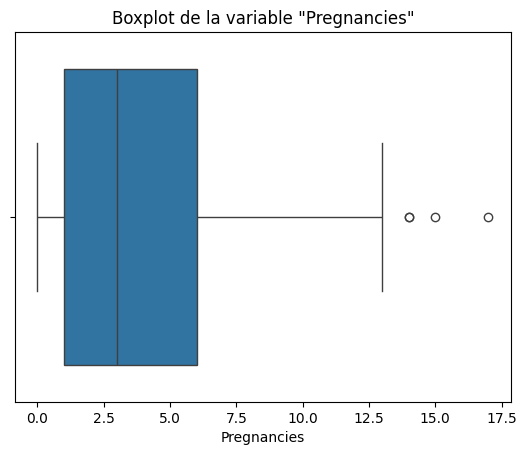

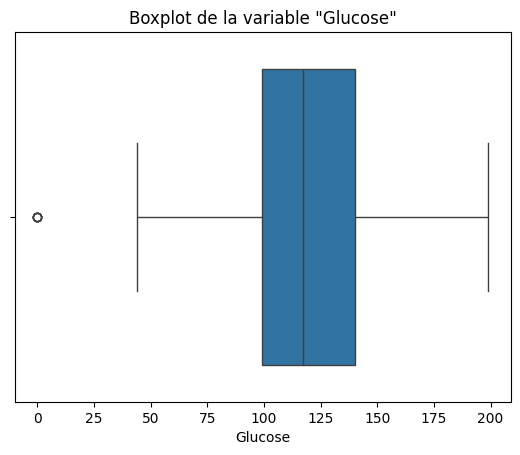

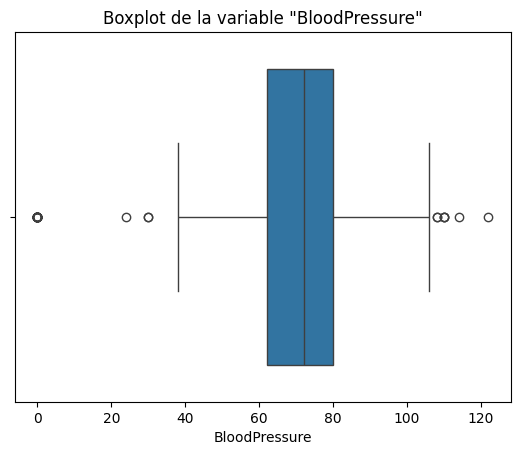

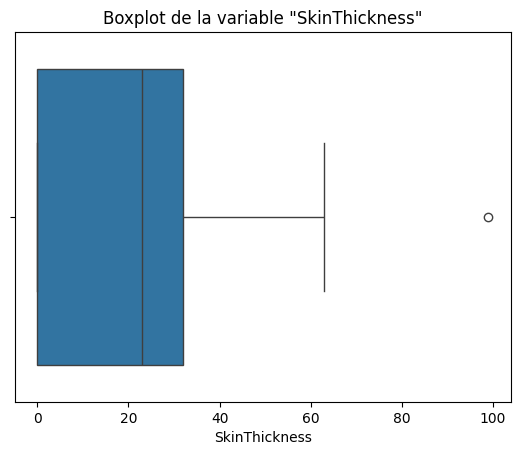

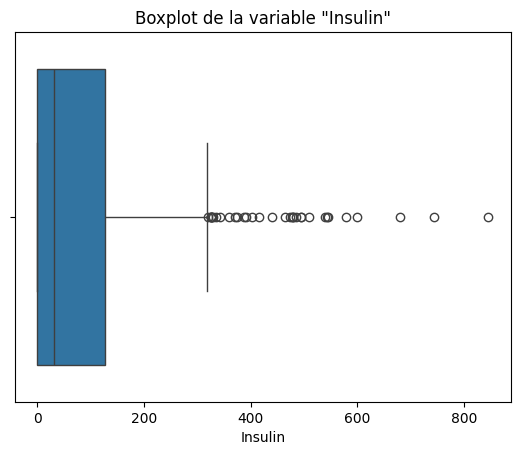

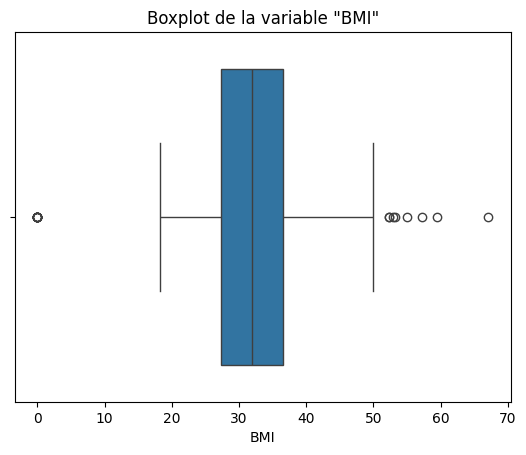

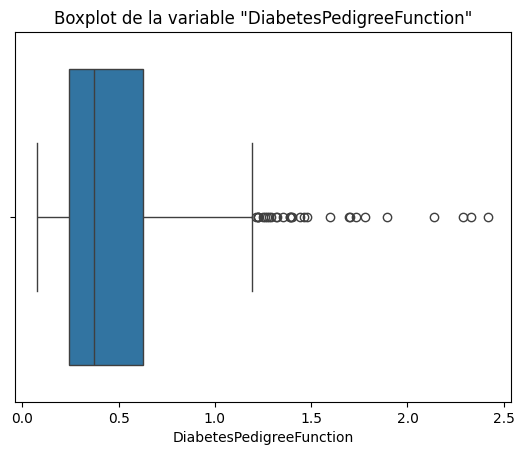

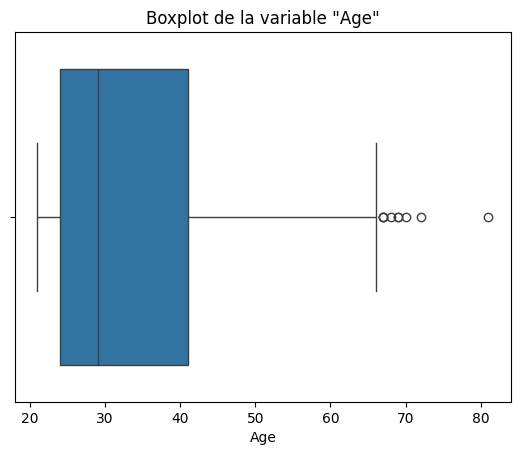

In [16]:
# Génération des boxplots pour chaque variable numérique sur des graphiques séparés
for col in ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']:
    sns.boxplot(x=diabete_data[col])
    plt.title(f'Boxplot de la variable "{col}"')
    plt.show()

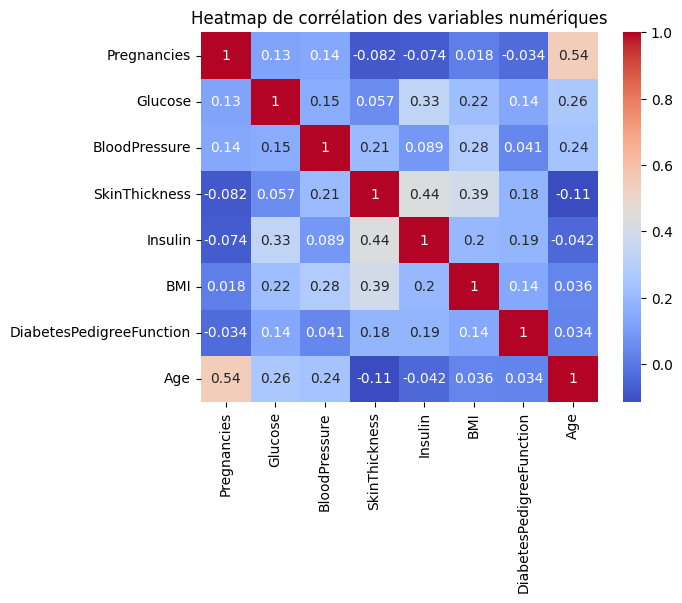

In [18]:
# Sélection des variables numériques
num_vars = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
df_num = diabete_data[num_vars]

# Génération de la heatmap de corrélation
sns.heatmap(df_num.corr(), cmap='coolwarm', annot=True)
plt.title('Heatmap de corrélation des variables numériques')
plt.show()

## Modélisation Random Forest (Forêt Aléatoire)

In [4]:
from sklearn.model_selection import train_test_split

X = diabete_data.drop('Outcome', axis=1)  # Variables prédictives
y = diabete_data['Outcome']  # Variable cible

# Diviser la base de données en train et test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300,500,1000],
    'max_depth': [1,2,3,4,6,7,8,9,10]
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)

Meilleurs paramètres : {'max_depth': 8, 'n_estimators': 100}


In [22]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, oob_score=True, random_state=42)

In [23]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)

## Evaluation des performances du modèle

In [24]:
# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                 0.965798          0.746753
1       AUC                 0.950704          0.722222
2    Recall                 0.901408          0.636364


Les performances du modèle varient entre l'ensemble d'entraînement et celui de test, mettant en lumière des tendances significatives. Sur l'ensemble d'entraînement, le modèle atteint des résultats encourageants avec une précision d'environ 96.6%, une AUC de 95.1%, et un rappel de 90.1%, illustrant sa capacité à bien prédire les résultats sur les données utilisées pour son apprentissage. Cependant, sur l'ensemble de test, ces performances diminuent considérablement, avec une précision de seulement 74.7%, une AUC de 72.2%, et un rappel de 63.6%.

Cette différence notable entre les performances des deux ensembles suggère une possible **suradaptation du modèle aux données d'entraînement (overfitting)**.

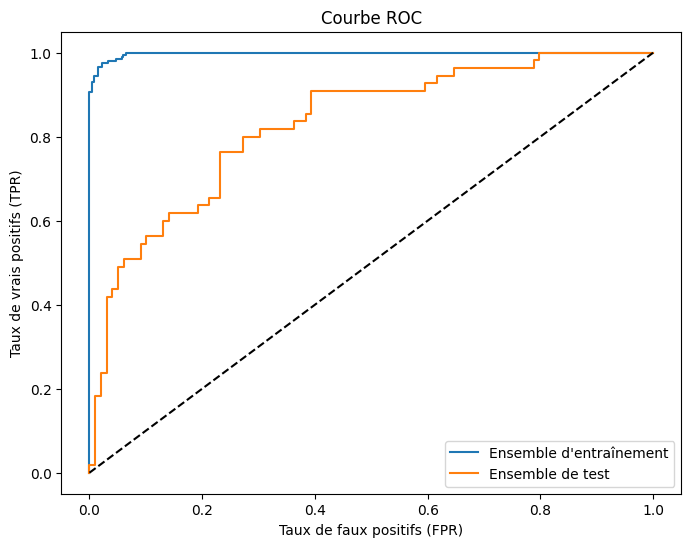

In [30]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

# Obtenir les scores de probabilité pour les classes positives
y_train_prob = random_forest.predict_proba(X_train)[:, 1]
y_test_prob = random_forest.predict_proba(X_test)[:, 1]

# Calculer les taux de faux positifs (FPR) et les taux de vrais positifs (TPR)
train_fpr, train_tpr, _ = roc_curve(y_train, y_train_prob)
test_fpr, test_tpr, _ = roc_curve(y_test, y_test_prob)

# Tracer les courbes ROC
plt.figure(figsize=(8, 6))
plt.plot(train_fpr, train_tpr, label='Ensemble d\'entraînement')
plt.plot(test_fpr, test_tpr, label='Ensemble de test')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend()
plt.show()

Importance des variables :
                   Variable  Importance
0                   Glucose    0.288725
1                       BMI    0.173107
2                       Age    0.145240
3  DiabetesPedigreeFunction    0.111973
4                   Insulin    0.078125
5             BloodPressure    0.076784
6               Pregnancies    0.069068
7             SkinThickness    0.056977



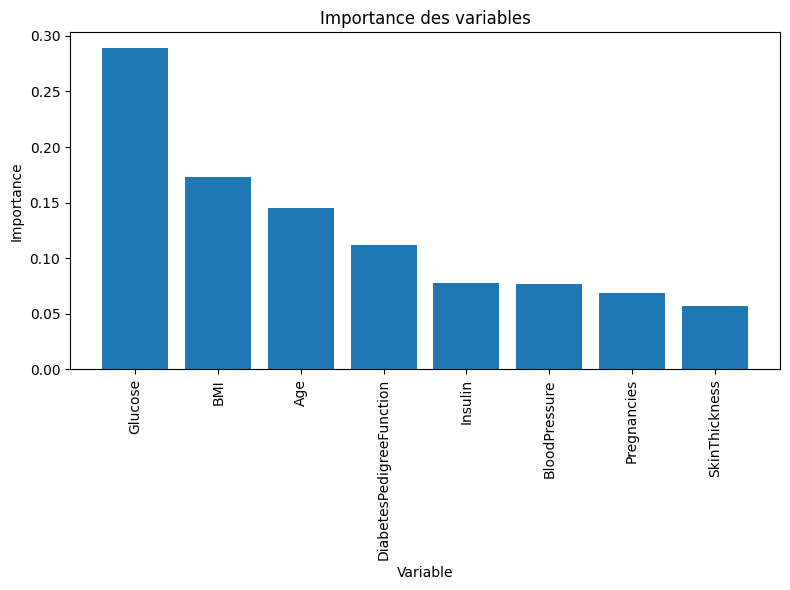

In [26]:
# Obtenir l'importance des variables
importance = random_forest.feature_importances_

# Créer un DataFrame pour afficher l'importance des variables
importance_df = pd.DataFrame({'Variable': X.columns, 'Importance': importance})
importance_df = importance_df.sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Afficher l'importance des variables
print("Importance des variables :")
print(importance_df)
print()

# Tracer l'importance des variables
plt.figure(figsize=(8, 6))
plt.bar(importance_df['Variable'], importance_df['Importance'])
plt.xticks(rotation='vertical')
plt.xlabel('Variable')
plt.ylabel('Importance')
plt.title('Importance des variables')
plt.tight_layout()
plt.show()

In [15]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Définir les hyperparamètres à tester à l'aide de GridSearch
param_grid = {
    'n_estimators': [100, 200, 300, 500, 1000],
    'max_depth': [1, 2, 3, 4, 6, 7, 8, 9, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt']
}

# Créer un modèle de forêt aléatoire
rf_model = RandomForestClassifier(oob_score=True, random_state=42)

# Utiliser GridSearch pour trouver les meilleurs paramètres
grid_search = GridSearchCV(rf_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres :", grid_search.best_params_)


Meilleurs paramètres : {'max_depth': 9, 'max_features': 'sqrt', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 300}


In [16]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, oob_score=True,
                       random_state=42)

In [17]:
# Créer un modèle de forêt aléatoire avec les meilleurs paramètres
random_forest = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'], max_depth=grid_search.best_params_['max_depth'], oob_score=True, random_state=42)
# Entraîner le modèle sur les données d'entraînement
random_forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=9, n_estimators=300, oob_score=True,
                       random_state=42)

In [18]:
import pandas as pd
from sklearn.metrics import accuracy_score, roc_auc_score, recall_score

# Prédire les classes sur les ensembles d'entraînement et de test
y_train_pred = random_forest.predict(X_train)
y_test_pred = random_forest.predict(X_test)


In [19]:

# Calculer les mesures de performance
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)
train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)
train_recall = recall_score(y_train, y_train_pred)
test_recall = recall_score(y_test, y_test_pred)

# Créer le tableau d'évaluation des performances
performance_table = pd.DataFrame({
    'Métrique': ['Accuracy', 'AUC', 'Recall'],
    'Ensemble d\'entraînement': [train_accuracy, train_auc, train_recall],
    'Ensemble de test': [test_accuracy, test_auc, test_recall]
})

# Afficher le tableau d'évaluation des performances
print(performance_table)

   Métrique  Ensemble d'entraînement  Ensemble de test
0  Accuracy                 0.993485          0.753247
1       AUC                 0.990610          0.735354
2    Recall                 0.981221          0.672727
